## Crawling [cikrf.ru](http://www.cikrf.ru/) website

In [1]:
import requests
import lxml.html

In [2]:
def normalize_string(string, to_strip=True,
                     to_rm_chars=',)(',
                     to_replace_chars=' ', to_replace_with='_',
                     to_replace_patterns=[('_-_', '-')]):

    # обрезание пробельных символов
    if to_strip:
        string = string.strip()

    # удаление символов
    if to_rm_chars:
        for c in to_rm_chars:
            string = string.replace(c, '')

    # замена символов
    if to_replace_chars and to_replace_with:
        for c in to_replace_chars:
            string = string.replace(c, to_replace_with)

    # замена подпоследовательностей
    if to_replace_patterns:
        for pattern in to_replace_patterns:
            string = string.replace(pattern[0], pattern[1])

    return string

def get_links_dict_from_page(page):
    page_tree = lxml.html.document_fromstring(page.text)
    dictionary = {normalize_string(el.text) : el.values()[0] for el in page_tree.forms[0][0] if el.keys()[0] == 'value'}
    keys = [normalize_string(el.text) for el in page_tree.forms[0][0] if el.keys()[0] == 'value']
    return dictionary, keys

In [3]:
lvl0_link = 'http://www.vybory.izbirkom.ru/region/izbirkom?action=show&root_a=1000001&vrn=100100084849062&region=0&global=true&type=0&prver=0&pronetvd=null'

lvl0_page = requests.get(lvl0_link)

In [4]:
lvl1_links, lvl1_keys = get_links_dict_from_page(lvl0_page)
assert(87 == len(lvl1_keys))

lvl1_pages = {i : requests.get(lvl1_links[i]) for i in lvl1_keys}

In [5]:
lvl1_special_keys = tuple(lvl1_keys[-2:])

lvl2_links = {key : get_links_dict_from_page(lvl1_pages[key])[0] for key in lvl1_keys if key not in lvl1_special_keys}
lvl2_keys = {key : get_links_dict_from_page(lvl1_pages[key])[1] for key in lvl1_keys if key not in lvl1_special_keys}

http://www.vybory.izbirkom.ru/region/izbirkom?action=show&global=true&root=1000001&tvd=100100084849067&vrn=100100084849062&prver=0&pronetvd=null&region=0&sub_region=0&type=0&vibid=100100084849067

http://www.vybory.izbirkom.ru/region/izbirkom?action=show&global=true&root=1000001&tvd=100100084849067&vrn=100100084849062&prver=0&pronetvd=null&region=0&sub_region=0&type=0&vibid=100100084849067

http://www.vybory.izbirkom.ru/region/izbirkom?action=show&amp;global=true&amp;root=1000001&amp;tvd=100100084849067&amp;vrn=100100084849062&amp;prver=0&amp;pronetvd=null&amp;region=0&amp;sub_region=0&amp;type=0&amp;vibid=100100084849067

In [30]:
data = np.genfromtxt("./Downloads/report.csv", delimiter=',', names=True, dtype=np.int)

In [31]:
data.dtype

dtype([('Сумма', '<i8'), ('Республика_Адыгея_Адыгея', '<i8'), ('Республика_Алтай', '<i8'), ('Республика_Башкортостан', '<i8'), ('Республика_Бурятия', '<i8'), ('Республика_Дагестан', '<i8'), ('Республика_Ингушетия', '<i8'), ('КабардиноБалкарская_Республика', '<i8'), ('Республика_Калмыкия', '<i8'), ('КарачаевоЧеркесская_Республика', '<i8'), ('Республика_Карелия', '<i8'), ('Республика_Коми', '<i8'), ('Республика_Крым', '<i8'), ('Республика_Марий_Эл', '<i8'), ('Республика_Мордовия', '<i8'), ('Республика_Саха_Якутия', '<i8'), ('Республика_Северная_Осетия__Алания', '<i8'), ('Республика_Татарстан_Татарстан', '<i8'), ('Республика_Тыва', '<i8'), ('Удмуртская_Республика', '<i8'), ('Республика_Хакасия', '<i8'), ('Чеченская_Республика', '<i8'), ('Чувашская_Республика__Чувашия', '<i8'), ('Алтайский_край', '<i8'), ('Забайкальский_край', '<i8'), ('Камчатский_край', '<i8'), ('Краснодарский_край', '<i8'), ('Красноярский_край', '<i8'), ('Пермский_край', '<i8'), ('Приморский_край', '<i8'), ('Ставропольск

In [26]:
turnout = np.array([data[name][9] / data[name][0] for name in data.dtype.names])
putin = np.array([data[name][15] / data[name][9] for name in data.dtype.names])
other = np.array([1.0 - data[name][15] / data[name][9] for name in data.dtype.names])

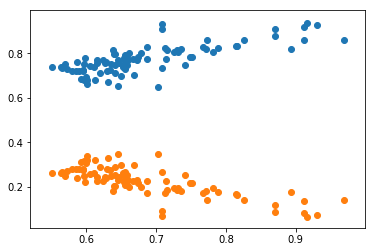

In [29]:
plt.scatter(turnout, putin)
plt.scatter(turnout, other)